In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 6.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import pandas as pd
import shutil
from ultralytics import YOLO

In [ ]:
os.makedirs("/content/generated-or-not")

In [ ]:
!unzip "./drive/MyDrive/generated-or-not.zip" -d "/content/generated-or-not"

Archive:  ./drive/MyDrive/generated-or-not.zip
  inflating: /content/generated-or-not/images/01SPjdJuM4.jpg  
  inflating: /content/generated-or-not/images/01a7MiLURN.jpg  
  inflating: /content/generated-or-not/images/05q5J7VWr4.png  
  inflating: /content/generated-or-not/images/0666kmCAAC.jpeg  
  inflating: /content/generated-or-not/images/07aHL0dVg4.jpg  
  inflating: /content/generated-or-not/images/09Egy0VfTa.jpeg  
  inflating: /content/generated-or-not/images/0HBgVT0VvK.png  
  inflating: /content/generated-or-not/images/0IE6GFg13M.jpg  
  inflating: /content/generated-or-not/images/0OOMZGDyV8.jpg  
  inflating: /content/generated-or-not/images/0R1JRbHS33.jpeg  
  inflating: /content/generated-or-not/images/0SSwUAl04C.png  
  inflating: /content/generated-or-not/images/0XXH9LDP1C.jpg  
  inflating: /content/generated-or-not/images/0XbpHcAqVo.jpg  
  inflating: /content/generated-or-not/images/0XftCQbfAl.jpg  
  inflating: /content/generated-or-not/images/0Y1MAVdEa5.jpg  
  inf

In [ ]:
train_df = pd.read_csv('/content/generated-or-not/train.csv')
test_df = pd.read_csv('/content/generated-or-not/test.csv')
val_df = train_df.sample(frac=0.15)
# Удаление выбранных записей из исходного датафрейма
train_df.drop(val_df.index, inplace=True)

In [ ]:
os.makedirs("/content/data_yolo_format")
os.makedirs("/content/data_yolo_format/train")
os.makedirs("/content/data_yolo_format/train/generated")
os.makedirs("/content/data_yolo_format/train/not_generated")
os.makedirs("/content/data_yolo_format/val")
os.makedirs("/content/data_yolo_format/val/generated")
os.makedirs("/content/data_yolo_format/val/not_generated")
os.makedirs("/content/test")

In [ ]:
for index, row in test_df.iterrows():
  if os.path.exists(f'/content/generated-or-not/images/{row["id"]}'):
       shutil.copy(f'/content/generated-or-not/images/{row["id"]}', f'/content/test/{row["id"]}')
  elif os.path.exists(f'/content/generated-or-not/images/{row["id"]}.jpg'):
       shutil.copy(f'/content/generated-or-not/images/{row["id"]}.jpg', f'/content/test/{row["id"]}.jpg')
  elif os.path.exists(f'/content/generated-or-not/images/{row["id"]}.jpeg'):
       shutil.copy(f'/content/generated-or-not/images/{row["id"]}.jpeg', f'/content/test/{row["id"]}.jpeg')
  elif os.path.exists(f'/content/generated-or-not/images/{row["id"]}.webp'):
       shutil.copy(f'/content/generated-or-not/images/{row["id"]}.webp', f'/content/test/{row["id"]}.webp')
  elif os.path.exists(f'/content/generated-or-not/images/{row["id"]}.png'):
       shutil.copy(f'/content/generated-or-not/images/{row["id"]}.png', f'/content/test/{row["id"]}.png')

In [ ]:
# Проверка существования файла
file_path = '/content/test/yt9GwWtzr8.png'
if os.path.exists(file_path):
    print(f"Файл найден по пути: {file_path}")
else:
    print(f"Файл не найден в папке ")

Файл найден по пути: /content/test/yt9GwWtzr8.png


In [ ]:
train_df = pd.read_csv('/content/testovoe1-1/train/_classes.csv')
val_df = pd.read_csv('/content/testovoe1-1/valid/_classes.csv')
val_df

,filename,generated,not_generated
0,grytDsUbVt_jpg.rf.01929e243369d5cfcb2b2eabe7f9...,0,1
1,cnNJi23eLr_jpg.rf.02b380cf535492ac3e6d39c8cbf5...,0,1
2,ybYLDGKbgT_png.rf.012c1db6312301c3e67a6d909e1d...,1,0
3,NBk591Rv7Y_jpg.rf.02eceb6dc5cea57c8d506b2c3352...,0,1
4,NsTS1RiPsL_jpg.rf.0459528e3632432b825daaa7717d...,0,1
...,...,...,...
197,6oZMBwgraz_jpeg.rf.f520ab639721c0ad1cfd2352945...,1,0
198,wIGgZdCDq5_png.rf.fe2c4ea2bb357f85de3e5ad0e86b...,1,0
199,tzbqbfhZ24_jpg.rf.fdc844487689c71e87fff2345b82...,0,1
200,MBSfkIFIAY_jpg.rf.ff3f39ed21aa14841fe00b72bba9...,0,1


In [ ]:
print(train_df.columns)

Index(['filename', ' generated', ' not_generated'], dtype='object')


In [ ]:
for index, row in train_df.iterrows():
  if row[' not_generated'] == 1:
    if os.path.exists(f'/content/testovoe1-1/train/{row["filename"]}'):
      shutil.copy(f'/content/testovoe1-1/train/{row["filename"]}', f'/content/data_yolo_format/train/not_generated/{row["filename"]}')
  elif row[' generated'] == 1:
    if os.path.exists(f'/content/testovoe1-1/train/{row["filename"]}'):
      shutil.copy(f'/content/testovoe1-1/train/{row["filename"]}', f'/content/data_yolo_format/train/generated/{row["filename"]}')

In [ ]:
for index, row in val_df.iterrows():
  if row[' not_generated'] == 1:
    if os.path.exists(f'/content/testovoe1-1/valid/{row["filename"]}'):
      shutil.copy(f'/content/testovoe1-1/valid/{row["filename"]}', f'/content/data_yolo_format/val/not_generated/{row["filename"]}')
  elif row[' generated'] == 1:
    if os.path.exists(f'/content/testovoe1-1/valid/{row["filename"]}'):
      shutil.copy(f'/content/testovoe1-1/valid/{row["filename"]}', f'/content/data_yolo_format/val/generated/{row["filename"]}')

In [ ]:
print(len(os.listdir('/content/testovoe1-1/train/')))
print(len(os.listdir('/content/testovoe1-1/valid/')))

4759
398


In [ ]:
print(len(os.listdir('/content/data_yolo_format/train/not_generated/')))
print(len(os.listdir('/content/data_yolo_format/train/generated/')))
print(len(os.listdir('/content/data_yolo_format/val/not_generated/')))
print(len(os.listdir('/content/data_yolo_format/val/generated/')))

2658
2100
214
183


In [ ]:
!ls '/content/data_yolo_format'

train  val


In [ ]:
DATA_DIR = '/content/data_yolo_format'

In [ ]:
model = YOLO('/content/drive/MyDrive/Тестовое/yolov8l_70_640_dropout_0.5/weights/best.pt')

results = model.train(data=DATA_DIR, epochs=50, imgsz=640, dropout = 0.5, warmup_epochs = 0)

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/content/drive/MyDrive/Тестовое/yolov8l_70_640_dropout_0.5/weights/best.pt, data=/content/data_yolo_format, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 6.23M/6.23M [00:00<00:00, 15.5MB/s]


AMP: checks passed ✅


train: Scanning /content/data_yolo_format/train... 2430 images, 0 corrupt: 100%|██████████| 2430/2430 [00:00<00:00, 5139.10it/s]


train: New cache created: /content/data_yolo_format/train.cache


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/data_yolo_format/val... 202 images, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 2372.10it/s]

val: New cache created: /content/data_yolo_format/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50      7.56G   0.001936         16        640:   2%|▏         | 3/152 [00:02<01:37,  1.52it/s]

       1/50      7.59G   0.003172         16        640:   4%|▍         | 6/152 [00:04<01:30,  1.61it/s]
100%|██████████| 755k/755k [00:00<00:00, 15.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all      0.926          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all      0.921          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50       7.9G    0.01996         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50       7.9G    0.01169         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50       7.9G      0.024         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all      0.955          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50      7.92G    0.02043         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50       7.9G    0.01923         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50       7.9G    0.01812         14        640: 100%|██████████| 152/152 [01:50<00:00,  1.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50      7.92G   0.007927         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50       7.9G   0.008197         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50      7.92G    0.02976         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50       7.9G    0.02432         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50      7.92G    0.01989         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50       7.9G    0.01252         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50      7.92G   0.003579         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50       7.9G   0.003676         14        640: 100%|██████████| 152/152 [01:44<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50      7.92G   0.005103         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50       7.9G   0.005271         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50      7.92G   0.003707         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50       7.9G   0.005716         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50       7.9G    0.01511         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50       7.9G   0.008588         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50       7.9G    0.01446         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50      7.92G   0.008971         14        640: 100%|██████████| 152/152 [01:49<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50       7.9G    0.00487         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all      0.955          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50      7.92G   0.002276         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50       7.9G   0.007242         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50      7.92G   0.004602         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50       7.9G   0.002782         14        640: 100%|██████████| 152/152 [01:44<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50       7.9G   0.008124         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50      7.92G   0.008154         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50       7.9G   0.002483         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50      7.92G   0.001075         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all       0.97          1



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem       loss  Instances       Size


      41/50       7.9G    0.00277         14        640: 100%|██████████| 152/152 [01:49<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50      7.92G   0.001495         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50       7.9G   0.002104         14        640: 100%|██████████| 152/152 [01:48<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50       7.9G   0.002873         14        640: 100%|██████████| 152/152 [01:47<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50       7.9G   0.003241         14        640: 100%|██████████| 152/152 [01:52<00:00,  1.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50      7.94G  0.0009319         14        640: 100%|██████████| 152/152 [01:48<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50      7.92G   0.002192         14        640: 100%|██████████| 152/152 [01:46<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50      7.92G   0.001698         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50       7.9G   0.001615         14        640: 100%|██████████| 152/152 [01:45<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50      7.92G  0.0008871         14        640: 100%|██████████| 152/152 [01:44<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all      0.975          1



50 epochs completed in 1.572 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 72.6MB
Optimizer stripped from runs/classify/train/weights/best.pt, 72.6MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36187138 parameters, 0 gradients, 98.7 GFLOPs
train: /content/data_yolo_format/train... found 2430 images in 2 classes ✅ 
val: /content/data_yolo_format/val... found 202 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]


                   all       0.98          1
Speed: 0.8ms preprocess, 10.2ms inference, 0.1ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [ ]:
# Define path to the image file
source = '/content/test/01SPjdJuM4.jpg'

# Run inference on 'bus.jpg' with arguments
model.predict('/content/test/01SPjdJuM4.jpg', save=True, imgsz=256, conf=0.5)


image 1/1 /content/test/01SPjdJuM4.jpg: 256x256 not_generated 1.00, generated 0.00, 154.0ms
Speed: 10.4ms preprocess, 154.0ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/classify/train73


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'generated', 1: 'not_generated'}
 obb: None
 orig_img: array([[[243, 203, 161],
         [243, 203, 161],
         [243, 203, 161],
         ...,
         [241, 197, 150],
         [241, 197, 150],
         [241, 197, 150]],
 
        [[243, 203, 161],
         [243, 203, 161],
         [243, 203, 161],
         ...,
         [242, 197, 153],
         [242, 197, 153],
         [242, 197, 153]],
 
        [[243, 203, 161],
         [243, 203, 161],
         [243, 203, 161],
         ...,
         [243, 198, 155],
         [243, 198, 155],
         [243, 198, 155]],
 
        ...,
 
        [[ 23, 120, 106],
         [ 23, 121, 109],
         [ 25, 124, 114],
         ...,
         [ 30, 118, 118],
         [ 33, 122, 119],
         [ 33, 124, 121]],
 
        [[ 23, 119, 109],
         [ 24, 120, 113],
         [ 28, 125, 121],
         ...,
         [ 41, 134, 133],
    

In [ ]:
test_img_list = os.listdir('/content/test/')

In [ ]:
test_img_list_with_path = ["/content/test/" + filename for filename in test_img_list]
test_img_list_with_path

['/content/test/82nuz7VlCN.jpeg',
 '/content/test/wCtgGW3hJY.jpeg',
 '/content/test/wtLU8hoAz4.jpeg',
 '/content/test/oGECKjTj5S.png',
 '/content/test/8Jpd9SLbqd.jpeg',
 '/content/test/20kFo0P1BQ.png',
 '/content/test/ztBFsCnl0i.jpeg',
 '/content/test/pDB2S06L2V.jpeg',
 '/content/test/b4bfgPwia6.jpeg',
 '/content/test/ainT6QMK7Q.jpeg',
 '/content/test/fPowDyaVsI.webp',
 '/content/test/z6r1XKXtp9.png',
 '/content/test/Irh8HGAQ4F.jpeg',
 '/content/test/OZdL3rtZ5h.jpeg',
 '/content/test/hLsK7eZx6y.jpeg',
 '/content/test/QQaDYoaFUi.jpeg',
 '/content/test/HTdHSTewXP.jpeg',
 '/content/test/BEeMouBbFb.jpeg',
 '/content/test/ZDksdaao66.png',
 '/content/test/QQWVXtc402.jpeg',
 '/content/test/R1hy2mf67S.jpeg',
 '/content/test/Hm3lGxGKf7.jpeg',
 '/content/test/1WXHpfzzMR.png',
 '/content/test/PxvUp9NTCm.jpeg',
 '/content/test/AKTQCtaWi4.png',
 '/content/test/9hEvvkphC0.jpeg',
 '/content/test/JcEPnVZdXG.jpeg',
 '/content/test/qf8m3BpZ1D.jpeg',
 '/content/test/oQQR8GD9Jo.png',
 '/content/test/bqodL

In [ ]:
model = YOLO('/content/drive/MyDrive/Тестовое/yolov8l_120_640_dropout_0.5/weights/best.pt')

In [ ]:
for test_img in test_img_list_with_path:
  results = model(test_img, save_txt=True)


image 1/1 /content/test/82nuz7VlCN.jpeg: 640x640 not_generated 1.00, generated 0.00, 1974.8ms
Speed: 74.9ms preprocess, 1974.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict
1 label saved to runs/classify/predict/labels

image 1/1 /content/test/wCtgGW3hJY.jpeg: 640x640 generated 1.00, not_generated 0.00, 1765.3ms
Speed: 21.3ms preprocess, 1765.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict
2 labels saved to runs/classify/predict/labels

image 1/1 /content/test/wtLU8hoAz4.jpeg: 640x640 generated 1.00, not_generated 0.00, 1781.1ms
Speed: 22.1ms preprocess, 1781.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict
3 labels saved to runs/classify/predict/labels

image 1/1 /content/test/oGECKjTj5S.png: 640x640 generated 1.00, not_generated 0.00, 3834.4ms
Speed: 26.1ms preprocess, 3834.4ms inference, 0.1ms postprocess 

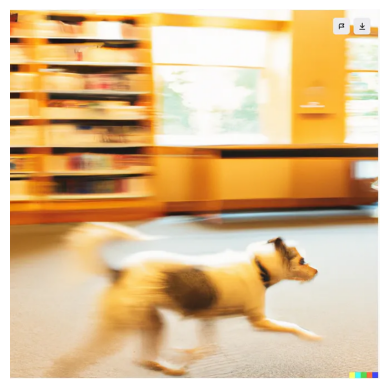

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Путь к изображению
image_path = '/content/test/DuwXCNmeMx.webp'

# Отображение изображения
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Отключение осей координат
plt.show()

In [ ]:
sample_submission_df = pd.read_csv('/content/generated-or-not/sample_submission.csv')
sample_submission_df

,id,target
0,Qt1fGUB0Vz.jpeg,0.5
1,j4Rhioq7R3.jpeg,0.5
2,rD0hgFHJUZ.jpeg,0.5
3,aY5z1EJsJ6.jpeg,0.5
4,qZ3IoxD2TE.jpeg,0.5
...,...,...
501,Qrme6EUmL1,0.5
502,4369Dl8wfs.jpeg,0.5
503,BrNEvRNpPu.jpeg,0.5
504,DuwXCNmeMx.webp,0.5


In [ ]:
label_path = os.path.join('/content/runs/classify/predict/labels/', 'Kd24ZC8sx0' + ".txt")
with open(label_path, 'r') as file:
  lines = file.readlines()
  print(lines)
  for line in lines:
    parts = line.strip().split()
    print(parts)

['0.65 not_generated\n', '0.35 generated\n']
['0.65', 'not_generated']
['0.35', 'generated']


In [ ]:
for index, row in sample_submission_df.iterrows():
  filename_without_extension = row['id'].split('.')[0]
  label_path = os.path.join('/content/runs/classify/predict/labels/', filename_without_extension + ".txt")
  with open(label_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
      parts = line.strip().split()
      if parts[1] == 'generated':
        sample_submission_df.at[index, 'target'] = parts[0]

In [ ]:
sample_submission_df

,id,target
0,Qt1fGUB0Vz.jpeg,0.00
1,j4Rhioq7R3.jpeg,0.00
2,rD0hgFHJUZ.jpeg,0.00
3,aY5z1EJsJ6.jpeg,1.00
4,qZ3IoxD2TE.jpeg,0.00
...,...,...
501,Qrme6EUmL1,1.00
502,4369Dl8wfs.jpeg,0.00
503,BrNEvRNpPu.jpeg,0.00
504,DuwXCNmeMx.webp,0.09


In [ ]:
sample_submission_df['target'] = pd.to_numeric(sample_submission_df['target'], errors='coerce')
sample_submission_df['target'] = sample_submission_df['target'].apply(lambda x: 0 if x < 0.5 else 1)

In [ ]:
sample_submission_df.to_csv('sample_submission_yolov8l_120_640_dropout_0.5.csv', index=False)